In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Familiarization

In [2]:
# read csv data
data=pd.read_csv('/content/drive/MyDrive/datasets/credit_card_default.csv')

In [3]:
# copy the data
df=data.copy()

In [4]:
# first 5 rows of the dataset
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [5]:
# last 3 rows of the dataset
df.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


Note:
1. This is a Credit card dataset and we are predicting default payment next month.
2. Default payment is categorical column. so its a classification problem since we are predicting the class
3. Its a binary classification problem

In [6]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Note:
1. There are 30,000 observations and 25 columns
2. There is no missing values
3. All columns are numerical type

In [7]:
# shape of the datset
df.shape

(30000, 25)

Dataset contains 30000 rows & 25 columns

In [8]:
# statistical summary of the dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Note: There are some outliers in the dataset

# Pre-Processing

In [9]:
# null values in the dataset
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

No null values in the dataset.

In [10]:
# check the unique values in each column
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          3
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

Note:
1. We can drop column ID, since its a unique value.
2. columns SEX, EDUCATION, MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6  are discrete numeric columns. so we can remove these columns from outlier handling.

In [11]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Max Age :79 & Min Age:21


Text(0.5, 1.0, 'Outliers in the dataset')

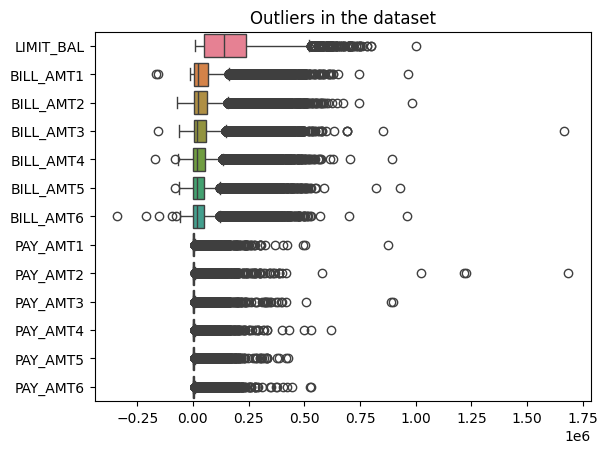

In [12]:
# Outliers in the dataset
# Age column value between 21-79, so we can remove that column from outlier handling
print(f"Max Age :{df['AGE'].max()} & Min Age:{df['AGE'].min()}")

sns.boxplot(data=df[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],orient='h')
plt.title('Outliers in the dataset')

There are many outliers in the dataset. we need to handle these outliers.

In [13]:
# drop ID column
df.drop('ID',axis=1,inplace=True)

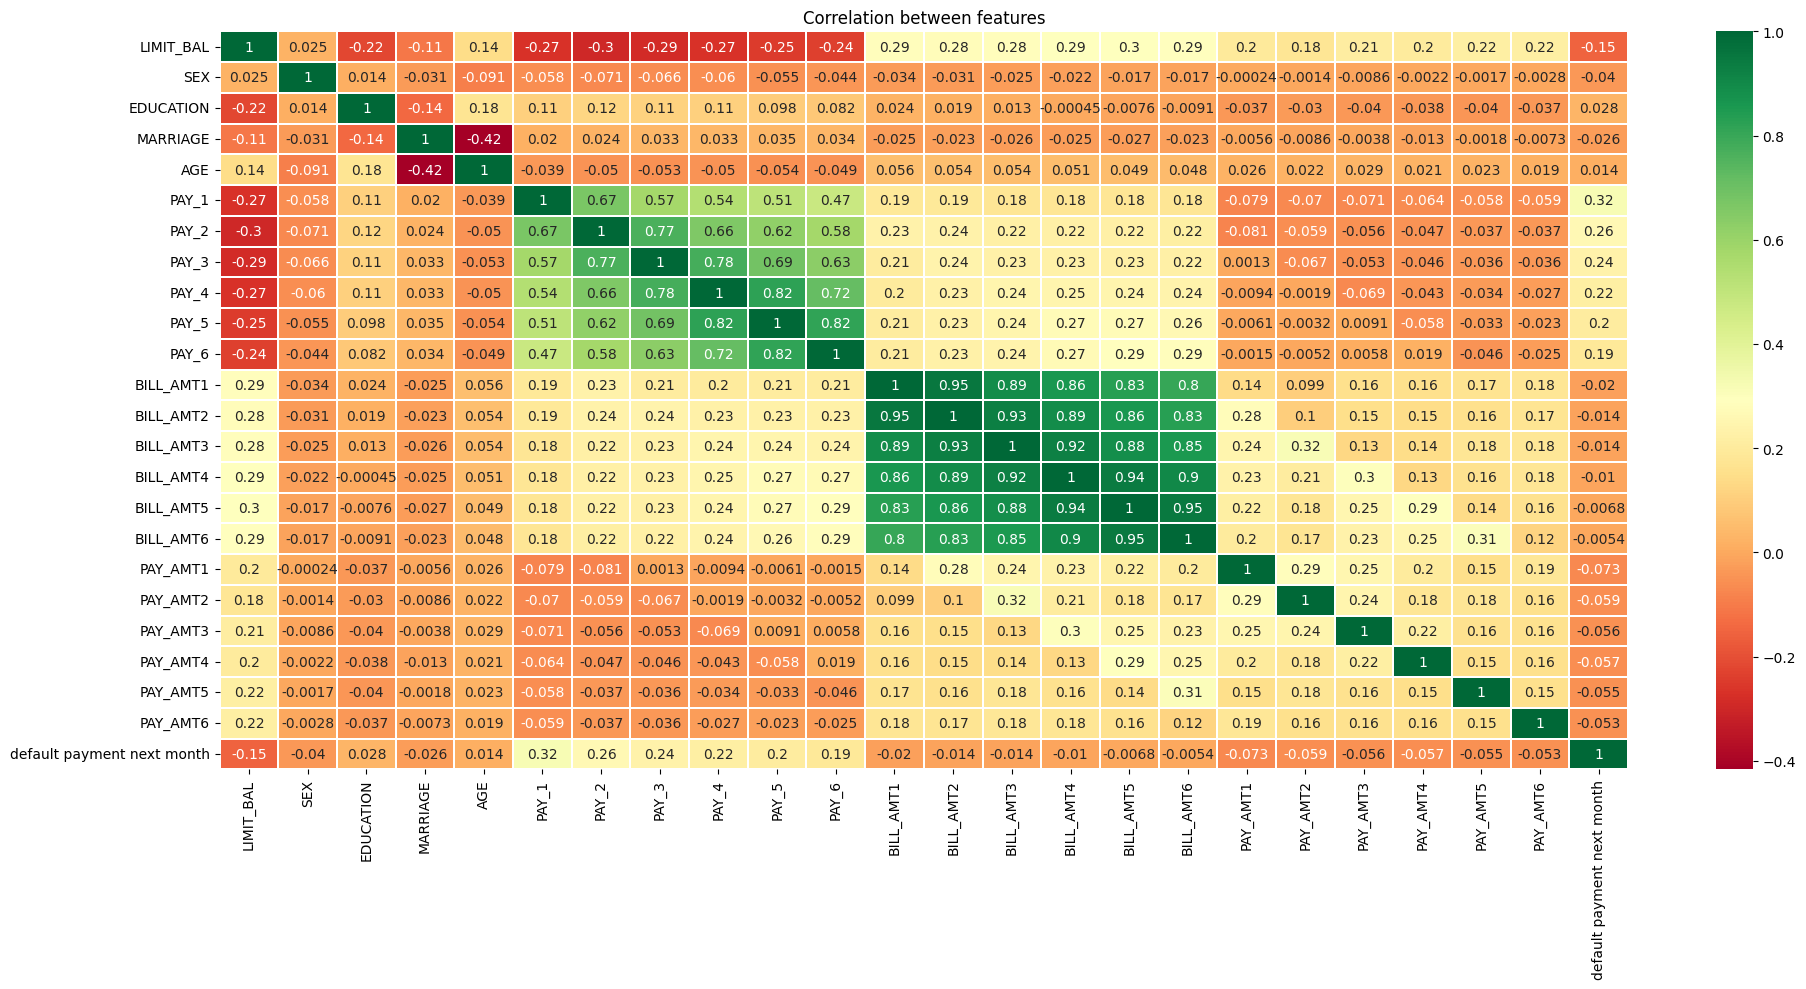

In [14]:
# before outlier handling, lets check the collinearity between column
# plot heatmap
plt.figure(figsize=(20,10))
plt.title('Correlation between features')
sns.heatmap(df.corr(),linewidths=0.2, cmap='RdYlGn',annot=True)
plt.tight_layout()
plt.show()

Note: There are some multi collinearity between features, so lets do PCA on the features.

In [15]:
# lets check teh min values of each column
# find min value of each column
cols=df.columns

min_vals=[]
# find the min value of each column
for i in cols:
  print(f"Min value of {i}={df[i].min()}")
  min_vals.append(df[i].min())

Min value of LIMIT_BAL=10000
Min value of SEX=1
Min value of EDUCATION=0
Min value of MARRIAGE=1
Min value of AGE=21
Min value of PAY_1=-2
Min value of PAY_2=-2
Min value of PAY_3=-2
Min value of PAY_4=-2
Min value of PAY_5=-2
Min value of PAY_6=-2
Min value of BILL_AMT1=-165580
Min value of BILL_AMT2=-69777
Min value of BILL_AMT3=-157264
Min value of BILL_AMT4=-170000
Min value of BILL_AMT5=-81334
Min value of BILL_AMT6=-339603
Min value of PAY_AMT1=0
Min value of PAY_AMT2=0
Min value of PAY_AMT3=0
Min value of PAY_AMT4=0
Min value of PAY_AMT5=0
Min value of PAY_AMT6=0
Min value of default payment next month=0


Note: since the column contains negative values and zero values, we cannot apply log transformation

In [16]:
# lets cap the value using IQR
out_cols=['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in out_cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR= Q3-Q1

  upper=Q3 + (1.5*IQR)
  lower=Q1 -(1.5*IQR)

  # replacing outlier with the cut off values
  df[col]=np.where(df[col]<lower,lower,np.where(df[col]>upper,upper,df[col]))

Outlier are capped using IQR method.

In [17]:
# Encoding
# since there is no categorical column in the datset
# no need for encoding

# Split the dataset into train & test dataset

In [18]:
# install imbalanced-learn
!pip install imbalanced-learn

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from collections import Counter

In [20]:
# Split dataset into dependant & independant features
y=df['default payment next month']
x=df.drop('default payment next month',axis=1)

In [21]:
# Split the x & y into train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
# shape of train & test set
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(24000, 23) (6000, 23) (24000,) (6000,)


# Re-sampling Train dataset

In [23]:
# our dataset is imbalanced, so lets apply resampling technique on the train dataset
# SMOTE + ENN Algorithm
#Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed.


# Balance the training data using SMOTE
print(f"Before {Counter(y_train)}")
smenn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smenn.fit_resample(x_train, y_train)
print(f"After {Counter(y_train_balanced)}")



Before Counter({0: 18677, 1: 5323})
After Counter({1: 13535, 0: 8386})


Note: We can see that now there is more balance in the dtaset compared to old.

# Apply PCA

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
# Standardize the features
scaler = StandardScaler()
x_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
x_test_scaled = scaler.transform(x_test)

In [26]:
# Apply PCA
pc = PCA(n_components=14)
X_train_pca = pc.fit_transform(x_train_balanced_scaled)
X_test_pca = pc.transform(x_test_scaled)

In [27]:
PC_train=pd.DataFrame(X_train_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
PC_test=pd.DataFrame(X_test_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])

our features are now, PC_train,y_train_balanced,PC_test,y_test

# Calculate Cross_val_score for different model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostClassifier

In [30]:
# find optimum value of k in knn
accuracy_score_k=[]
for i in range(3,15):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(PC_train,y_train_balanced)
    y_pred=knn.predict(PC_test)
    accuracy_score_k.append(accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'Accuracy score vs k')

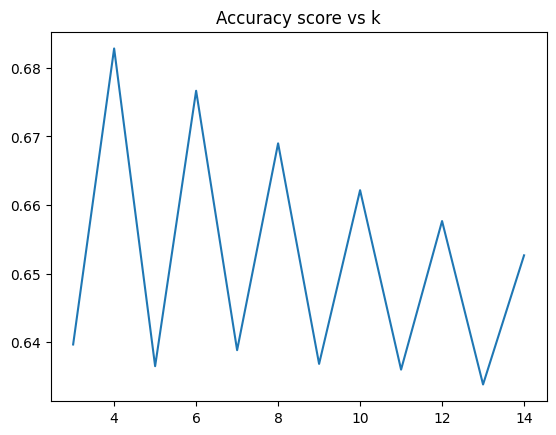

In [32]:
# lets plot the graph to find the k value with high accuracy
plt.plot(range(3,15),accuracy_score_k)
plt.title('Accuracy score vs k')

Note: Highest score is K =4

In [28]:
# install catboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.6 MB/s eta 0:00:00


In [51]:
# apply different clssification model & calculate its cross val score
# Perform different algorithms such as kNN,SVM, Gradient Boosting, Adaboosting and XG Boost
models = {
    'LogisticRegression': LogisticRegression(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2),
    'SVC': SVC(kernel='linear'),
    'XGBClassifier': XGBClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42)
}

In [50]:
# combine x_train & x_test value as x

# Combine PC_train and PC_test
x_combined = np.concatenate((PC_train, PC_test), axis=0)

# Combine y_train_balanced and y_test
y_combined = np.concatenate((y_train_balanced, y_test), axis=0)

In [52]:
# Calculate cross val score for each model, n_splits=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# to store cross val score
cv_results = {}

for model_name, model in models.items():
    cv_result = cross_val_score(model,x_combined,y_combined,cv=kf,scoring='accuracy')
    cv_results[model_name] = cv_result.mean()

# result
for model_name, cv_result in cv_results.items():
    print(f"{model_name}: {cv_result:.4f}")


LogisticRegression: 0.7498
CatBoost: 0.8108
RandomForestClassifier: 0.8240
KNeighborsClassifier: 0.7928
SVC: 0.7500
XGBClassifier: 0.8053
AdaBoostClassifier: 0.7693
GradientBoostingClassifier: 0.7856


Note: Random Forest CLassifier got the highest accuracy score, 0.824



# Hyper parameter tuning Random Search CV

In [36]:
from sklearn.model_selection import RandomizedSearchCV

We are using GridSearchCV for hyper parameter tuning.

In [53]:
params={'max_depth':[10,100],
        'n_estimators':[50,100,600]}

In [59]:
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),

                                   param_distributions = params, verbose = 1,

                                   n_jobs = -1, n_iter = 6)

random_result = random_search.fit(PC_train,y_train_balanced)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


KeyboardInterrupt: 

 Its taking too  much time to fine tune, . so unable to find the best params. My GPU usage crossed the limit.

# Manual Hyper Parameter tuning, since Randomized Search CV doesn't complete.

In [55]:
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(PC_train,y_train_balanced)
y_pred=rf.predict(PC_test)
print(f"Accuracy score:{accuracy_score(y_test,y_pred)}")

rf=RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(PC_train,y_train_balanced)
y_pred=rf.predict(PC_test)
print(f"Accuracy score:{accuracy_score(y_test,y_pred)}")

Accuracy score:0.6911666666666667
Accuracy score:0.6935


In [56]:
rf=RandomForestClassifier(n_estimators=200,random_state=42,max_depth=90)
rf.fit(PC_train,y_train_balanced)
y_pred=rf.predict(PC_test)
print(f"Accuracy score:{accuracy_score(y_test,y_pred)}")

rf=RandomForestClassifier(n_estimators=500,random_state=42,max_depth=90)
rf.fit(PC_train,y_train_balanced)
y_pred=rf.predict(PC_test)
print(f"Accuracy score:{accuracy_score(y_test,y_pred)}")

Accuracy score:0.6911666666666667
Accuracy score:0.6935


In [60]:
rf2=RandomForestClassifier(n_estimators=500,random_state=42,max_depth=40,criterion='entropy')
rf2.fit(PC_train,y_train_balanced)
y_pred=rf2.predict(PC_test)
print(f"Accuracy score:{accuracy_score(y_test,y_pred)}")

Accuracy score:0.6898333333333333


Best 'paramaters are n_estimators=500,random_state=42,max_depth=90.

# Final Model with hyper parameters

In [61]:
rf=RandomForestClassifier(n_estimators=500,random_state=42,max_depth=90)
rf.fit(PC_train,y_train_balanced)
y_pred=rf.predict(PC_test)
print(f"Accuracy score:{accuracy_score(y_test,y_pred)}")

Accuracy score:0.6935
